In [1]:
cmap = 'tab20'

## Data collection

### Consumer Price Index

In [2]:
df = pd.read_csv('Datasets/Consumer Price Index/Consumer_Price_Index_Monthly.csv')

# date
df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])

# data correction
f1 = df['MEASURE'] == 'CPI_MTHCHG'
f2 = df['UNIT_MEASURE'] == 'INDX'
df.loc[f1&f2, 'MEASURE'] = 'CPI_INDEX14'

# repl1 = {'CPI_INDEX14':'CPI_INDEX', 'CPI_INDEX21':'CPI_INDEX'}
# df['MEASURE'] = df['MEASURE'].map(repl1)

# transform
f1 = df['TIME_PERIOD'] > '2010-06-01'
f2 = df['MEASURE'].str.startswith('CPI_INDEX')
df1 = df[f1&f2].groupby(['CPI_DIV','TIME_PERIOD']).OBS_VALUE.min().unstack().T
print(df1.shape)

# correction for new 2021 index
dt1 = '2020-12-01'
vals = df1.loc[dt1]
df2 = pd.concat([df1[:dt1], df1[dt1:][1:] + vals - 100])

print(df2.shape)
df2[:5]

(169, 14)
(169, 14)


CPI_DIV,ALL,COM,EDU,FNB,FUR,HOU,INS,MED,MIS,REC,RES,TEX,TOB,TRN
TIME_PERIOD,,,,,,,,,,,,,,
2010-07-01,94.72,98.92,83.01,84.52,89.59,101.08,NaN,97.73,91.90,91.51,92.65,98.56,78.16,95.45
2010-08-01,95.23,99.71,83.01,86.18,90.56,101.09,NaN,97.73,92.15,95.54,92.66,97.74,78.45,96.03
2010-09-01,96.05,99.72,85.96,88.52,90.15,101.26,NaN,97.73,92.60,97.65,92.66,97.86,78.45,97.54
2010-10-01,96.60,99.77,85.96,88.90,90.79,102.51,NaN,97.73,93.24,97.90,92.66,97.43,78.45,97.46
2010-11-01,96.62,99.74,85.96,89.05,90.84,102.47,NaN,97.73,93.42,97.74,92.66,97.53,78.45,97.38


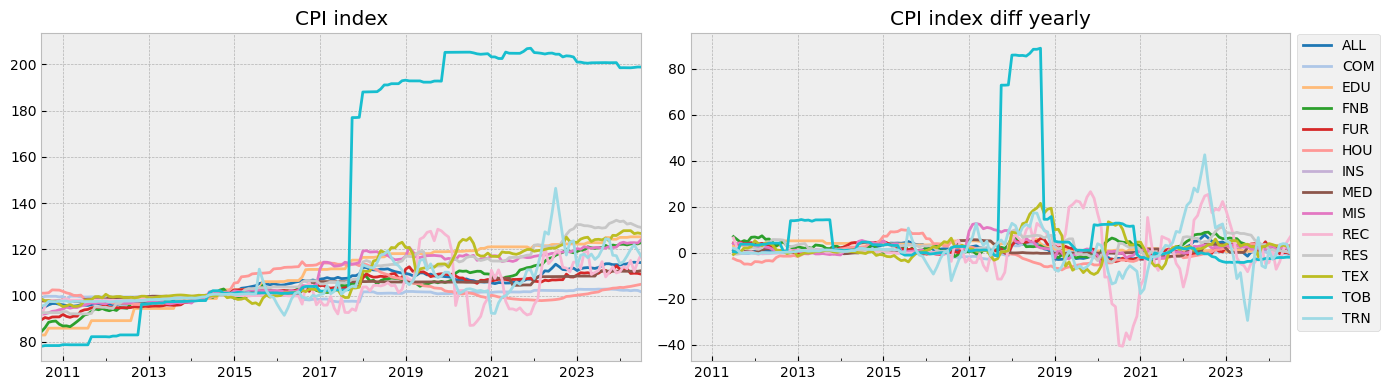

In [3]:
# plotting
_, ax = plt.subplots(1,2, figsize = (14,4))
p = df2.plot(ax = ax[0], title = 'CPI index', legend = False, xlabel = '',cmap = cmap)
p = df2.diff(12).plot(ax = ax[1], title = 'CPI index diff yearly', legend = False, xlabel = '',cmap = cmap)
p.legend(bbox_to_anchor = (1,1.02))
plt.tight_layout()
plt.savefig('imgs/eda_add_cpi.png')

In [4]:
# metadata
df_meta = pd.read_csv('FCSA_CPI.csv')[['CPI_DIV','CPI Division']].drop_duplicates().reset_index(drop = True)
fout = open('imgs/eda_add_cpi.html','w')
fout.write(df_meta.to_html())
fout.close()
df_meta

,CPI_DIV,CPI Division
0,TOB,Tobacco
1,MED,Medical Care
2,ALL,All Items
3,FUR,Furniture and Household Goods
4,EDU,Education
5,REC,Recreation and Culture
6,MIS,Miscellaneous Goods and Services
7,COM,Communications
8,FNB,Food and Beverages
9,TEX,"Textiles, Clothing and Footwear"


In [5]:
# merge with all feats
df_feats = df2.copy()
cols = df_feats.columns
df_feats.columns = [f'CPI_{f}' for f in cols]
for f in cols:
    df_feats[f'CPI_{f}_diff1'] = df_feats[f'CPI_{f}'].diff(1)
    df_feats[f'CPI_{f}_diff12'] = df_feats[f'CPI_{f}'].diff(12)
df_feats = df_feats.reset_index().rename(columns = {'TIME_PERIOD':'dt_month'})

df_feats = df_feats.shift(1)
print(df_feats.shape)
df_feats[:3]

(169, 43)


,dt_month,CPI_ALL,CPI_COM,CPI_EDU,CPI_FNB,CPI_FUR,CPI_HOU,CPI_INS,CPI_MED,CPI_MIS,CPI_REC,CPI_RES,CPI_TEX,CPI_TOB,CPI_TRN,CPI_ALL_diff1,CPI_ALL_diff12,CPI_COM_diff1,CPI_COM_diff12,CPI_EDU_diff1,CPI_EDU_diff12,CPI_FNB_diff1,CPI_FNB_diff12,CPI_FUR_diff1,CPI_FUR_diff12,CPI_HOU_diff1,CPI_HOU_diff12,CPI_INS_diff1,CPI_INS_diff12,CPI_MED_diff1,CPI_MED_diff12,CPI_MIS_diff1,CPI_MIS_diff12,CPI_REC_diff1,CPI_REC_diff12,CPI_RES_diff1,CPI_RES_diff12,CPI_TEX_diff1,CPI_TEX_diff12,CPI_TOB_diff1,CPI_TOB_diff12,CPI_TRN_diff1,CPI_TRN_diff12
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-07-01,94.72,98.92,83.01,84.52,89.59,101.08,NaN,97.73,91.90,91.51,92.65,98.56,78.16,95.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-08-01,95.23,99.71,83.01,86.18,90.56,101.09,NaN,97.73,92.15,95.54,92.66,97.74,78.45,96.03,0.51,NaN,0.79,NaN,0.00,NaN,1.66,NaN,0.97,NaN,0.01,NaN,NaN,NaN,0.00,NaN,0.25,NaN,4.03,NaN,0.01,NaN,-0.82,NaN,0.29,NaN,0.58,NaN


### Currency Strength

In [6]:
df = pd.read_csv('Datasets/Currency Strength/AED-USD.csv')
# df['Date'] = pd.to_datetime(df['Date'])
df['dt_month'] = pd.to_datetime(df['Date'].str[:7])
df1 = df.groupby('dt_month')[['Close']].mean()['2010-01-01':]
print(df1.shape)
df1[:5]

(180, 1)


,Close
dt_month,
2010-01-01,0.27
2010-02-01,0.27
2010-03-01,0.27
2010-04-01,0.27
2010-05-01,0.27


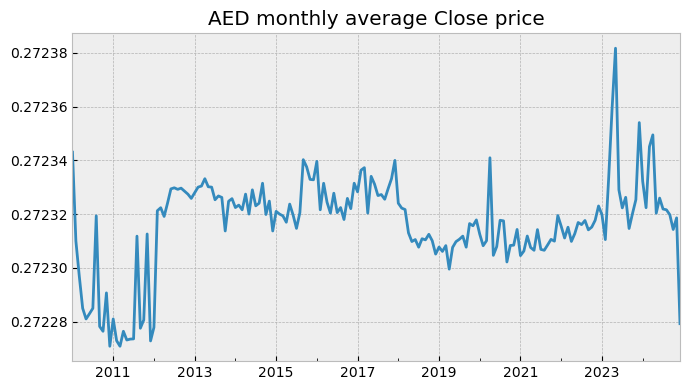

In [7]:
# plotting
_, ax = plt.subplots(1,1, figsize = (7,4))
p = df1.plot(ax = ax, title = 'AED monthly average Close price', legend = False, xlabel = '')
plt.tight_layout()
plt.savefig('imgs/eda_add_curr.png')

In [8]:
# merge
df2 = df1.rename(columns = {'Close':'CURR_Close'}).reset_index()

df2 = df2.shift(1)

df_feats = df_feats.merge(df2, on = 'dt_month')
print(df_feats.shape)
df_feats[:3]

(169, 44)


,dt_month,CPI_ALL,CPI_COM,CPI_EDU,CPI_FNB,CPI_FUR,CPI_HOU,CPI_INS,CPI_MED,CPI_MIS,CPI_REC,CPI_RES,CPI_TEX,CPI_TOB,CPI_TRN,CPI_ALL_diff1,CPI_ALL_diff12,CPI_COM_diff1,CPI_COM_diff12,CPI_EDU_diff1,CPI_EDU_diff12,CPI_FNB_diff1,CPI_FNB_diff12,CPI_FUR_diff1,CPI_FUR_diff12,CPI_HOU_diff1,CPI_HOU_diff12,CPI_INS_diff1,CPI_INS_diff12,CPI_MED_diff1,CPI_MED_diff12,CPI_MIS_diff1,CPI_MIS_diff12,CPI_REC_diff1,CPI_REC_diff12,CPI_RES_diff1,CPI_RES_diff12,CPI_TEX_diff1,CPI_TEX_diff12,CPI_TOB_diff1,CPI_TOB_diff12,CPI_TRN_diff1,CPI_TRN_diff12,CURR_Close
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-07-01,94.72,98.92,83.01,84.52,89.59,101.08,NaN,97.73,91.90,91.51,92.65,98.56,78.16,95.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27
2,2010-08-01,95.23,99.71,83.01,86.18,90.56,101.09,NaN,97.73,92.15,95.54,92.66,97.74,78.45,96.03,0.51,NaN,0.79,NaN,0.00,NaN,1.66,NaN,0.97,NaN,0.01,NaN,NaN,NaN,0.00,NaN,0.25,NaN,4.03,NaN,0.01,NaN,-0.82,NaN,0.29,NaN,0.58,NaN,0.27


### Gross Domestic Product

In [9]:
df = pd.read_csv('Datasets/Gross Domestic Product/GDP_Quarterly_Current_Prices.csv')

# date
df['dt_month'] = pd.to_datetime(df['TIME_PERIOD'].astype(str) + df['QUARTER'])

# transform
f1 = df['UNIT_MEASURE'] == 'MILAED'
df1 = df[f1].groupby(['MEASURE','dt_month']).OBS_VALUE.min().unstack().T

print(df1.shape)
df1[:5]

(50, 20)


MEASURE,ACC,ACT,AGR,ART,CON,EDU,ELE,FIN,HUM,INF,MAN,MIN,NFC,PRO,PUB,REA,TOT_GDP,TOT_NO,TRA,WHO
dt_month,,,,,,,,,,,,,,,,,,,,
2012-01-01,"6,606.60","1,367.95","3,848.62","1,748.60","32,028.55","4,096.41","6,953.41","21,017.74","2,787.11","8,676.92","29,743.64","137,630.65","322,129.19","15,122.15","15,646.02","15,976.13","360,160.91","222,530.25","19,088.30","37,822.09"
2012-04-01,"6,228.83","1,233.57","2,410.73","1,801.83","30,710.71","4,177.34","8,875.31","20,355.42","3,084.83","8,697.72","28,027.73","125,618.74","311,738.13","14,759.08","16,939.21","16,501.14","350,266.33","224,647.58","20,272.90","40,571.23"
2012-07-01,"4,653.24","1,271.90",761.90,"1,782.43","28,554.33","4,339.65","10,497.32","19,029.53","2,935.74","9,146.12","28,364.15","133,818.60","317,156.03","13,438.35","17,540.77","15,951.42","354,998.23","221,179.63","22,056.96","40,855.83"
2012-10-01,"6,855.37","1,564.27","1,848.34","1,826.00","26,877.60","4,496.64","8,851.48","19,433.71","3,494.87","7,592.42","28,064.06","134,396.67","307,365.21","12,310.58","18,692.04","15,761.18","347,055.23","212,658.56","15,702.00","39,287.99"
2013-01-01,"7,644.27","1,521.25","3,485.00","1,814.19","29,611.78","4,531.54","9,165.01","23,175.95","3,459.75","8,656.29","27,385.28","134,129.62","319,410.47","14,893.57","18,264.53","15,711.10","362,372.19","228,242.57","18,516.85","40,406.22"


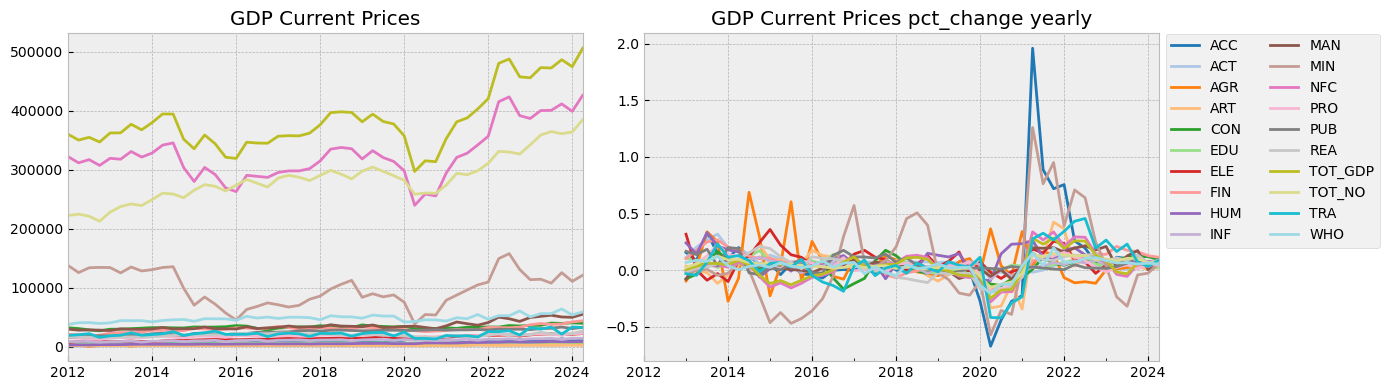

In [10]:
# plotting
_, ax = plt.subplots(1,2, figsize = (14,4))
p = df1.plot(ax = ax[0], title = 'GDP Current Prices', xlabel = '', legend = False, cmap = cmap)
p = df1.pct_change(4).plot(ax = ax[1], title = 'GDP Current Prices pct_change yearly', xlabel = '', legend = False, cmap = cmap)
p.legend(bbox_to_anchor = (1,1.02), ncols = 2)
plt.tight_layout()
plt.savefig('imgs/eda_add_gdp.png')

In [11]:
# metadata
df_meta = pd.read_csv('FCSA_GDP.csv')[['MEASURE','Measure']].drop_duplicates().reset_index(drop = True)
fout = open('imgs/eda_add_gdp.html','w')
fout.write(df_meta.to_html())
fout.close()
df_meta

,MEASURE,Measure
0,NFC,Non-Financial Corporations
1,FIN,Financial and insurance activities
2,WHO,Wholesale and Retail Trade
3,MIN,Mining and Quarrying
4,REA,Real Estate Activities
5,CON,Construction
6,PUB,Public Administration and Defence
7,HUM,Human Health and Social work Activities
8,PRO,Professional Activities
9,TOT_GDP,Gross Domestic Product


In [12]:
# expand and interpolate for every month
df2 = pd.DataFrame({'dt_month': df_feats.dt_month.unique()})
df2 = df2.merge(df1.reset_index(), how = 'left').set_index('dt_month')
df2 = df2.interpolate()
cols = df2.columns
df2.columns = [f'GDP_{f}' for f in cols]

# add pct changes
for f in cols:
    df2[f'GDP_{f}_pct12'] = df2[f'GDP_{f}'].pct_change(12)

df2 = df2.shift(3)

# merge
print(df_feats.shape)
df_feats = df_feats.merge(df2.reset_index(), on = 'dt_month', how = 'left')
print(df_feats.shape)
df_feats[:3]

(169, 44)
(169, 84)


,dt_month,CPI_ALL,CPI_COM,CPI_EDU,CPI_FNB,CPI_FUR,CPI_HOU,CPI_INS,CPI_MED,CPI_MIS,CPI_REC,CPI_RES,CPI_TEX,CPI_TOB,CPI_TRN,CPI_ALL_diff1,CPI_ALL_diff12,CPI_COM_diff1,CPI_COM_diff12,CPI_EDU_diff1,CPI_EDU_diff12,CPI_FNB_diff1,CPI_FNB_diff12,CPI_FUR_diff1,CPI_FUR_diff12,CPI_HOU_diff1,CPI_HOU_diff12,CPI_INS_diff1,CPI_INS_diff12,CPI_MED_diff1,CPI_MED_diff12,CPI_MIS_diff1,CPI_MIS_diff12,CPI_REC_diff1,CPI_REC_diff12,CPI_RES_diff1,CPI_RES_diff12,CPI_TEX_diff1,CPI_TEX_diff12,CPI_TOB_diff1,CPI_TOB_diff12,CPI_TRN_diff1,CPI_TRN_diff12,CURR_Close,GDP_ACC,GDP_ACT,GDP_AGR,GDP_ART,GDP_CON,GDP_EDU,GDP_ELE,GDP_FIN,GDP_HUM,GDP_INF,GDP_MAN,GDP_MIN,GDP_NFC,GDP_PRO,GDP_PUB,GDP_REA,GDP_TOT_GDP,GDP_TOT_NO,GDP_TRA,GDP_WHO,GDP_ACC_pct12,GDP_ACT_pct12,GDP_AGR_pct12,GDP_ART_pct12,GDP_CON_pct12,GDP_EDU_pct12,GDP_ELE_pct12,GDP_FIN_pct12,GDP_HUM_pct12,GDP_INF_pct12,GDP_MAN_pct12,GDP_MIN_pct12,GDP_NFC_pct12,GDP_PRO_pct12,GDP_PUB_pct12,GDP_REA_pct12,GDP_TOT_GDP_pct12,GDP_TOT_NO_pct12,GDP_TRA_pct12,GDP_WHO_pct12
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-07-01,94.72,98.92,83.01,84.52,89.59,101.08,NaN,97.73,91.90,91.51,92.65,98.56,78.16,95.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-08-01,95.23,99.71,83.01,86.18,90.56,101.09,NaN,97.73,92.15,95.54,92.66,97.74,78.45,96.03,0.51,NaN,0.79,NaN,0.00,NaN,1.66,NaN,0.97,NaN,0.01,NaN,NaN,NaN,0.00,NaN,0.25,NaN,4.03,NaN,0.01,NaN,-0.82,NaN,0.29,NaN,0.58,NaN,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Population

In [13]:
df = pd.read_csv('Datasets/Population/Population_Estimates_and_Growth_by_Gender.csv')

# date
df['dt_month'] = pd.to_datetime(df['TIME_PERIOD'].astype(str) + '-01-01')

# transform
df1 = df[df['dt_month'] > '2010-01-01'].groupby(['GENDER','dt_month']).OBS_VALUE.min().unstack().T
df1 = df1.rename(columns = {'_T':'T'})

print(df1.shape)
df1[:5]

(13, 3)


GENDER,F,M,T
dt_month,,,
2011-01-01,2450539,4793049,7243588
2012-01-01,2601658,4937649,7539307
2013-01-01,2716790,5129965,7846755
2014-01-01,2875407,5396717,8272124
2015-01-01,3047869,5690481,8738350


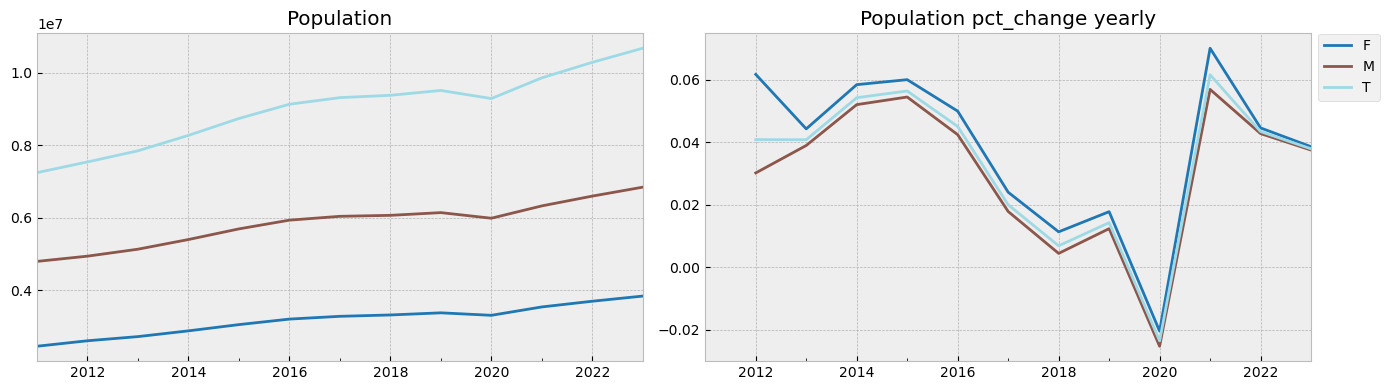

In [14]:
# plotting
_, ax = plt.subplots(1,2, figsize = (14,4))
p = df1.plot(ax = ax[0], title = 'Population', xlabel = '', legend = False, cmap = cmap)
p = df1.pct_change(1).plot(ax = ax[1], title = 'Population pct_change yearly', xlabel = '', legend = False, cmap = cmap)
p.legend(bbox_to_anchor = (1,1.02))
plt.tight_layout()
plt.savefig('imgs/eda_add_pop.png')

In [15]:
# expand and interpolate for every month
df2 = pd.DataFrame({'dt_month': df_feats.dt_month.unique()})
df2 = df2.merge(df1.reset_index(), how = 'left').set_index('dt_month')
df2 = df2.interpolate()
cols = df2.columns
df2.columns = [f'POP_{f}' for f in cols]

# add pct changes
for f in cols:
    df2[f'POP_{f}_pct12'] = df2[f'POP_{f}'].pct_change(12)

df2 = df2.shift(12)

# merge
print(df_feats.shape)
df_feats = df_feats.merge(df2.reset_index(), on = 'dt_month', how = 'left')
print(df_feats.shape)
df_feats[-3:]

(169, 84)
(169, 90)


,dt_month,CPI_ALL,CPI_COM,CPI_EDU,CPI_FNB,CPI_FUR,CPI_HOU,CPI_INS,CPI_MED,CPI_MIS,CPI_REC,CPI_RES,CPI_TEX,CPI_TOB,CPI_TRN,CPI_ALL_diff1,CPI_ALL_diff12,CPI_COM_diff1,CPI_COM_diff12,CPI_EDU_diff1,CPI_EDU_diff12,CPI_FNB_diff1,CPI_FNB_diff12,CPI_FUR_diff1,CPI_FUR_diff12,CPI_HOU_diff1,CPI_HOU_diff12,CPI_INS_diff1,CPI_INS_diff12,CPI_MED_diff1,CPI_MED_diff12,CPI_MIS_diff1,CPI_MIS_diff12,CPI_REC_diff1,CPI_REC_diff12,CPI_RES_diff1,CPI_RES_diff12,CPI_TEX_diff1,CPI_TEX_diff12,CPI_TOB_diff1,CPI_TOB_diff12,CPI_TRN_diff1,CPI_TRN_diff12,CURR_Close,GDP_ACC,GDP_ACT,GDP_AGR,GDP_ART,GDP_CON,GDP_EDU,GDP_ELE,GDP_FIN,GDP_HUM,GDP_INF,GDP_MAN,GDP_MIN,GDP_NFC,GDP_PRO,GDP_PUB,GDP_REA,GDP_TOT_GDP,GDP_TOT_NO,GDP_TRA,GDP_WHO,GDP_ACC_pct12,GDP_ACT_pct12,GDP_AGR_pct12,GDP_ART_pct12,GDP_CON_pct12,GDP_EDU_pct12,GDP_ELE_pct12,GDP_FIN_pct12,GDP_HUM_pct12,GDP_INF_pct12,GDP_MAN_pct12,GDP_MIN_pct12,GDP_NFC_pct12,GDP_PRO_pct12,GDP_PUB_pct12,GDP_REA_pct12,GDP_TOT_GDP_pct12,GDP_TOT_NO_pct12,GDP_TRA_pct12,GDP_WHO_pct12,POP_F,POP_M,POP_T,POP_F_pct12,POP_M_pct12,POP_T_pct12
166,2024-04-01,114.29,102.14,125.42,122.32,109.60,104.01,NaN,110.55,122.88,115.25,131.25,128.09,198.45,120.00,0.52,2.14,-0.25,-0.59,0.24,2.49,0.39,1.21,-2.00,-0.33,0.21,3.21,NaN,NaN,0.01,2.08,0.24,2.04,3.59,-3.87,0.31,1.06,-0.00,2.84,-0.02,-1.98,2.84,3.59,0.27,"9,792.15","3,005.68","3,648.09","2,369.53","40,492.15","7,200.27","21,134.86","42,029.98","8,409.60","14,222.73","49,795.34","110,768.77","399,051.11","21,942.12","30,704.37","22,110.84","474,791.14","364,022.36","33,464.07","53,700.56",0.06,0.04,0.05,0.00,0.12,0.03,0.05,0.13,0.08,0.08,0.01,-0.03,0.03,0.06,0.06,0.06,0.04,0.06,0.03,0.06,"3,835,651.00","6,842,905.00","10,678,556.00",0.03,0.03,0.03
167,2024-05-01,114.45,102.34,125.42,122.61,109.71,104.30,NaN,110.55,122.89,110.47,130.55,126.81,198.60,122.03,0.16,2.48,0.21,-0.40,0.00,2.49,0.29,1.93,0.11,0.11,0.29,3.11,NaN,NaN,0.00,2.08,0.01,2.44,-4.78,1.30,-0.70,0.66,-1.28,3.44,0.15,-2.01,2.02,4.06,0.27,"10,183.49","2,984.77","3,694.53","2,339.57","40,206.14","7,287.63","21,525.39","42,640.40","8,537.05","14,168.74","51,540.86","114,221.42","408,123.57","22,163.53","31,452.40","23,656.09","485,201.14","370,979.72","33,117.72","55,481.40",0.06,0.04,0.06,0.01,0.11,0.03,0.05,0.12,0.08,0.07,0.03,0.00,0.04,0.05,0.07,0.07,0.05,0.07,0.05,0.06,"3,835,651.00","6,842,905.00","10,678,556.00",0.03,0.02,0.02
168,2024-06-01,114.34,102.26,125.42,122.36,109.64,104.63,NaN,110.55,122.73,114.68,129.82,127.12,198.80,119.44,-0.11,2.55,-0.09,-0.48,0.00,2.49,-0.25,1.91,-0.06,0.16,0.33,3.22,NaN,NaN,-0.00,2.08,-0.16,1.93,4.20,4.68,-0.73,0.53,0.31,2.88,0.20,-1.85,-2.59,3.78,0.27,"10,574.84","2,963.86","3,740.97","2,309.62","39,920.13","7,374.99","21,915.91","43,250.81","8,664.51","14,114.76","53,286.37","117,674.07","417,196.04","22,384.93","32,200.44","25,201.33","495,611.15","377,937.08","32,771.37","57,262.23",0.06,0.04,0.06,0.02,0.10,0.02,0.05,0.12,0.07,0.05,0.05,0.03,0.05,0.05,0.07,0.08,0.06,0.07,0.07,0.06,"3,835,651.00","6,842,905.00","10,678,556.00",0.02,0.02,0.02


### Tourism

In [16]:
df = pd.read_csv('Datasets/Tourism/Hotel_Establishments_Main_Indicators.csv')

# date
df['dt_month'] = pd.to_datetime(df['TIME_PERIOD'].astype(str) + '-01-01')

# transform
df1 = df[df['dt_month'] > '2010-01-01'].groupby(['H_INDICATOR','dt_month']).OBS_VALUE.min().unstack().T

print(df1.shape)
df1[:5]

(12, 10)


H_INDICATOR,AR,ARR,FB,GUN,LS,OR,RR,TAR,TOR,TR
dt_month,,,,,,,,,,
2011-01-01,NaN,NaN,NaN,"30,892,681.00",3.00,NaN,NaN,NaN,NaN,NaN
2012-01-01,NaN,NaN,NaN,"34,990,487.00",3.00,NaN,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,"2,082,488,354.00","57,285,459.00",3.00,"8,529,388,426.00","17,684,807,305.00",NaN,NaN,"28,296,684,085.00"
2014-01-01,NaN,NaN,NaN,"63,704,817.00",3.00,"12,592,204,571.00","20,095,178,972.00",NaN,NaN,"32,687,383,542.00"
2015-01-01,"148,632.00",500.00,"11,689,873,713.00","69,766,747.00",3.00,"926,347,076.00","20,292,769,715.00",NaN,NaN,"32,908,990,504.00"


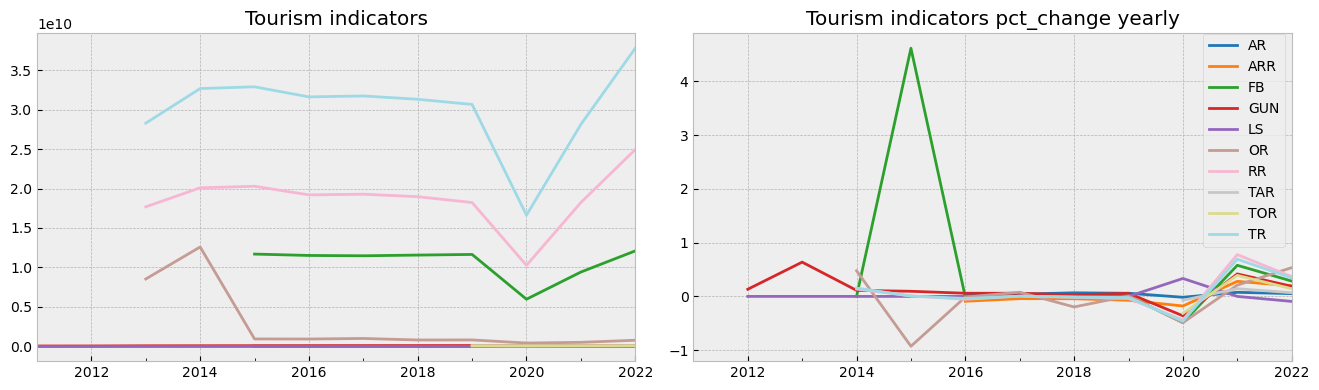

In [17]:
# plotting
_, ax = plt.subplots(1,2, figsize = (14,4))
p = df1.plot(ax = ax[0], title = 'Tourism indicators', xlabel = '', legend = False, cmap = cmap)
p = df1.pct_change(1).plot(ax = ax[1], title = 'Tourism indicators pct_change yearly', xlabel = '', legend = False, cmap = cmap)
p.legend(bbox_to_anchor = (1,1.02))
plt.tight_layout()
plt.savefig('imgs/eda_add_tour.png')

In [18]:
# metadata
df_meta = pd.read_csv('FCSA_TOUR.csv')[['H_INDICATOR','Hotel Indicator','UNIT_MEASURE']].drop_duplicates().reset_index(drop = True)
fout = open('imgs/eda_add_tour.html','w')
fout.write(df_meta.to_html())
fout.close()
df_meta

,H_INDICATOR,Hotel Indicator,UNIT_MEASURE
0,RR,Room revenue,AED
1,TOR,Total Occupaied Rooms,NUMBER
2,GUN,Guest nights,NUMBER
3,LS,Length of Stay (Avg),NUMBER
4,FB,Food and beverage revenue,AED
5,AR,Rooms (No.),NUMBER
6,OR,Other revenue,AED
7,TR,Total revenue,AED
8,TAR,Total Available Rooms,NUMBER
9,ARR,Average room rate (ARR),AED


In [19]:
# expand and interpolate for every month
df2 = pd.DataFrame({'dt_month': df_feats.dt_month.unique()})
df2 = df2.merge(df1.reset_index(), how = 'left').set_index('dt_month')
df2 = df2.interpolate()
cols = df2.columns
df2.columns = [f'TOUR_{f}' for f in cols]

# add pct changes
for f in cols:
    df2[f'TOUR_{f}_pct12'] = df2[f'TOUR_{f}'].pct_change(12)

df2 = df2.shift(12)

# merge
print(df_feats.shape)
df_feats = df_feats.merge(df2.reset_index(), on = 'dt_month', how = 'left')
print(df_feats.shape)
df_feats[:3]

(169, 90)
(169, 110)


,dt_month,CPI_ALL,CPI_COM,CPI_EDU,CPI_FNB,CPI_FUR,CPI_HOU,CPI_INS,CPI_MED,CPI_MIS,CPI_REC,CPI_RES,CPI_TEX,CPI_TOB,CPI_TRN,CPI_ALL_diff1,CPI_ALL_diff12,CPI_COM_diff1,CPI_COM_diff12,CPI_EDU_diff1,CPI_EDU_diff12,CPI_FNB_diff1,CPI_FNB_diff12,CPI_FUR_diff1,CPI_FUR_diff12,CPI_HOU_diff1,CPI_HOU_diff12,CPI_INS_diff1,CPI_INS_diff12,CPI_MED_diff1,CPI_MED_diff12,CPI_MIS_diff1,CPI_MIS_diff12,CPI_REC_diff1,CPI_REC_diff12,CPI_RES_diff1,CPI_RES_diff12,CPI_TEX_diff1,CPI_TEX_diff12,CPI_TOB_diff1,CPI_TOB_diff12,CPI_TRN_diff1,CPI_TRN_diff12,CURR_Close,GDP_ACC,GDP_ACT,GDP_AGR,GDP_ART,GDP_CON,GDP_EDU,GDP_ELE,GDP_FIN,GDP_HUM,GDP_INF,GDP_MAN,GDP_MIN,GDP_NFC,GDP_PRO,GDP_PUB,GDP_REA,GDP_TOT_GDP,GDP_TOT_NO,GDP_TRA,GDP_WHO,GDP_ACC_pct12,GDP_ACT_pct12,GDP_AGR_pct12,GDP_ART_pct12,GDP_CON_pct12,GDP_EDU_pct12,GDP_ELE_pct12,GDP_FIN_pct12,GDP_HUM_pct12,GDP_INF_pct12,GDP_MAN_pct12,GDP_MIN_pct12,GDP_NFC_pct12,GDP_PRO_pct12,GDP_PUB_pct12,GDP_REA_pct12,GDP_TOT_GDP_pct12,GDP_TOT_NO_pct12,GDP_TRA_pct12,GDP_WHO_pct12,POP_F,POP_M,POP_T,POP_F_pct12,POP_M_pct12,POP_T_pct12,TOUR_AR,TOUR_ARR,TOUR_FB,TOUR_GUN,TOUR_LS,TOUR_OR,TOUR_RR,TOUR_TAR,TOUR_TOR,TOUR_TR,TOUR_AR_pct12,TOUR_ARR_pct12,TOUR_FB_pct12,TOUR_GUN_pct12,TOUR_LS_pct12,TOUR_OR_pct12,TOUR_RR_pct12,TOUR_TAR_pct12,TOUR_TOR_pct12,TOUR_TR_pct12
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-07-01,94.72,98.92,83.01,84.52,89.59,101.08,NaN,97.73,91.90,91.51,92.65,98.56,78.16,95.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-08-01,95.23,99.71,83.01,86.18,90.56,101.09,NaN,97.73,92.15,95.54,92.66,97.74,78.45,96.03,0.51,NaN,0.79,NaN,0.00,NaN,1.66,NaN,0.97,NaN,0.01,NaN,NaN,NaN,0.00,NaN,0.25,NaN,4.03,NaN,0.01,NaN,-0.82,NaN,0.29,NaN,0.58,NaN,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### World Bank

In [20]:
df = pd.read_csv('Datasets/World Development Indicators/World_Development_Indicator.csv', skiprows = 4)
feats = ['Indicator Code'] + [str(i) for i in range(2010, 2024)]
df = df[feats].set_index('Indicator Code').T
print(df.shape)

# take only filled
a = df.count()
cols = list(a[a>12].index)
df = df[cols]

print(df.shape) 
df['dt_month'] = pd.to_datetime(df.index.astype(str) + '-01-01')
df1 = df.set_index('dt_month')
print(df1.shape)
df1[:3]

(14, 1496)
(14, 389)
(14, 389)


Indicator Code,SL.UEM.NEET.MA.ME.ZS,SL.UEM.1524.ZS,SL.UEM.1524.FE.ZS,SL.TLF.CACT.MA.ZS,SL.TLF.CACT.FE.ZS,SL.TLF.ACTI.ZS,SL.SRV.EMPL.ZS,SL.IND.EMPL.ZS,SL.FAM.WORK.ZS,SL.EMP.WORK.FE.ZS,SL.EMP.TOTL.SP.ZS,SL.EMP.TOTL.SP.FE.ZS,SL.EMP.SELF.MA.ZS,SL.EMP.MPYR.FE.ZS,SL.AGR.EMPL.MA.ZS,RQ.PER.RNK.UPPER,RQ.EST,RL.PER.RNK,PV.STD.ERR,PV.NO.SRC,PA.NUS.FCRF,NY.TRF.NCTR.CN,NY.GNP.MKTP.PP.CD,NY.GNP.MKTP.CN.AD,NY.GDP.PCAP.KN,NY.GDP.PCAP.CD,NY.GDP.MKTP.KN,NY.GDP.MKTP.CN,NY.GDP.DEFL.KD.ZG.AD,NV.SRV.TOTL.ZS,NV.SRV.TOTL.CN,NV.IND.TOTL.KD,NV.IND.MANF.KN,NV.IND.MANF.CD,NV.AGR.TOTL.ZS,NV.AGR.TOTL.CN,IT.NET.BBND.P2,IT.CEL.SETS.P2,CM.MKT.LCAP.GD.ZS,CC.PER.RNK.UPPER,CC.EST,BM.KLT.DINV.WD.GD.ZS,AG.PRD.FOOD.XD,AG.LND.CREL.HA,SL.TLF.ACTI.MA.ZS,SL.TLF.ACTI.1524.MA.ZS,SL.SRV.EMPL.MA.ZS,SL.IND.EMPL.MA.ZS,SL.FAM.WORK.MA.ZS,SL.EMP.VULN.ZS,SL.EMP.SELF.FE.ZS,SL.EMP.1524.SP.ZS,SL.EMP.1524.SP.FE.ZS,SL.AGR.EMPL.FE.ZS,SH.TBS.INCD,SH.STA.SMSS.RU.ZS,SH.STA.ODFC.RU.ZS,RQ.PER.RNK,RL.PER.RNK.UPPER,RL.EST,PV.PER.RNK.LOWER,PA.NUS.PPPC.RF,NY.GSR.NFCY.CN,NY.GNP.PCAP.CD,NY.GNP.MKTP.CD,NY.GDP.PCAP.PP.KD,NY.GDP.PCAP.KD,NY.GDP.MKTP.PP.KD,NY.GDP.MKTP.KD,NY.GDP.DEFL.ZS.AD,NV.SRV.TOTL.KD.ZG,NV.SRV.EMPL.KD,NV.IND.TOTL.KN,NV.IND.TOTL.CD,NV.IND.MANF.KD,...,EN.GHG.TOT.ZG.AR5,EN.GHG.N2O.PI.MT.CE.AR5,EN.GHG.N2O.FE.MT.CE.AR5,EN.GHG.CO2.ZG.AR5,EN.GHG.CO2.RT.GDP.KD,EN.GHG.CO2.BU.MT.CE.AR5,EN.GHG.CH4.TR.MT.CE.AR5,EN.GHG.CH4.IC.MT.CE.AR5,EN.GHG.ALL.PC.CE.AR5,EG.ELC.ACCS.ZS,EG.CFT.ACCS.ZS,CC.PER.RNK,BX.KLT.DINV.WD.GD.ZS,AG.PRD.CREL.MT,VA.PER.RNK,TX.VAL.MANF.ZS.UN,TX.VAL.FOOD.ZS.UN,TM.VAL.MMTL.ZS.UN,TM.VAL.FUEL.ZS.UN,SP.RUR.TOTL.ZS,SP.POP.TOTL.FE.IN,SP.POP.GROW,SP.POP.BRTH.MF,SP.POP.7579.FE.5Y,SP.POP.65UP.TO,SP.POP.65UP.FE.IN,SP.POP.6064.FE.5Y,SP.POP.5054.FE.5Y,SP.POP.4044.FE.5Y,SP.POP.3034.FE.5Y,SP.POP.2024.FE.5Y,SP.POP.1564.MA.IN,SP.POP.1519.FE.5Y,SP.POP.0509.FE.5Y,SP.POP.0014.MA.IN,SP.POP.0004.FE.5Y,SP.DYN.TFRT.IN,SP.DYN.IMRT.MA.IN,SP.DYN.AMRT.FE,SH.STA.SMSS.ZS,SH.STA.ODFC.ZS,SH.STA.BASS.ZS,SH.IMM.HEPB,SH.H2O.BASW.ZS,SH.DYN.NMRT,SH.DYN.MORT.MA,SH.DYN.AIDS.FE.ZS,SH.DYN.0509,SH.DTH.1519,SG.LAW.INDX,SE.SEC.AGES,SE.COM.DURS,EN.GHG.CO2.IP.MT.CE.AR5,EN.GHG.CH4.PI.MT.CE.AR5,EN.GHG.CH4.FE.MT.CE.AR5,EN.GHG.ALL.MT.CE.AR5,EG.ELC.ACCS.UR.ZS,EG.CFT.ACCS.UR.ZS,GE.PER.RNK,FP.CPI.TOTL.ZG,FM.LBL.BMNY.GD.ZS,FM.AST.NFRG.CN,FI.RES.XGLD.CD,FD.RES.LIQU.AS.ZS,FB.CBK.BRCH.P5,ER.FSH.PROD.MT,EN.URB.MCTY,EN.GHG.N2O.WA.MT.CE.AR5,EN.GHG.N2O.IP.MT.CE.AR5,EN.GHG.N2O.AG.MT.CE.AR5,EN.GHG.CO2.TR.MT.CE.AR5,EN.GHG.CO2.PC.CE.AR5,EN.GHG.CO2.IC.MT.CE.AR5,EN.GHG.CH4.ZG.AR5,EN.GHG.CH4.MT.CE.AR5
dt_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,6.59,6.09,11.05,88.98,42.38,77.83,70.18,26.26,0.03,98.29,75.57,39.69,4.44,1.44,4.06,72.73,0.32,62.09,0.24,7.00,3.67,"-71,200,000,000.00","574,646,935,217.91","1,102,140,000,000.00","129,978.08","35,392.26","1,102,444,296,000.00","1,102,444,296,000.00",16.53,47.59,"524,614,817,500.00","129,286,204,232.66","93,436,803,700.00","25,442,288,277.74",0.74,"8,103,249,700.00",11.34,128.82,43.80,83.81,0.89,0.67,129.70,295.00,89.04,64.02,66.89,29.05,0.02,0.40,1.71,50.78,26.38,0.12,1.80,98.49,0.00,61.72,66.35,0.32,59.72,0.52,"-308,000,000.00","34,050.00","300,106,194,690.27","55,724.73","34,540.97","472,644,379,374.39","292,968,610,443.84",100.00,1.53,"41,347.12","569,726,228,800.00","155,133,077,957.79","26,661,662,421.50",...,165.27,0.03,0.01,202.45,0.59,0.55,0.10,0.04,26.52,100.00,100.00,78.57,2.93,"5,336.00",23.22,4.74,1.39,1.63,1.08,15.91,"2,306,780.00",5.94,1.04,0.02,"14,927.00","8,108.00",0.25,1.11,3.84,14.00,16.98,"5,539,931.00",10.95,7.02,"628,241.00",9.10,1.79,7.80,59.12,98.44,0.00,99.12,94.00,99.81,3.60,9.80,25.03,1.10,358.00,26.88,11.00,6.00,15.10,0.10,34.53,224.92,100.00,100.00,77.99,0.88,70.20,"78,603,601,243.84","32,785,291,883.40",13.81,11.86,"70,788.00","3,687,047.00",0.13,1.00,0.37,30.06,20.26,63.15,59.30,42.38
2011-01-01,6.23,5.95,10.64,89.80,43.81,78.66,69.93,26.80,0.0

In [21]:
# expand and interpolate for every month
df2 = pd.DataFrame({'dt_month': df_feats.dt_month.unique()})
df2 = df2.merge(df1.reset_index(), how = 'left').set_index('dt_month')
df2 = df2.interpolate()
cols = df2.columns
df2.columns = [f'WB_{f}' for f in cols]

df2 = df2.shift(12)

# merge
print(df_feats.shape)
df_feats = df_feats.merge(df2.reset_index(), on = 'dt_month', how = 'left')
print(df_feats.shape)
df_feats[:3]

(169, 110)
(169, 499)


,dt_month,CPI_ALL,CPI_COM,CPI_EDU,CPI_FNB,CPI_FUR,CPI_HOU,CPI_INS,CPI_MED,CPI_MIS,CPI_REC,CPI_RES,CPI_TEX,CPI_TOB,CPI_TRN,CPI_ALL_diff1,CPI_ALL_diff12,CPI_COM_diff1,CPI_COM_diff12,CPI_EDU_diff1,CPI_EDU_diff12,CPI_FNB_diff1,CPI_FNB_diff12,CPI_FUR_diff1,CPI_FUR_diff12,CPI_HOU_diff1,CPI_HOU_diff12,CPI_INS_diff1,CPI_INS_diff12,CPI_MED_diff1,CPI_MED_diff12,CPI_MIS_diff1,CPI_MIS_diff12,CPI_REC_diff1,CPI_REC_diff12,CPI_RES_diff1,CPI_RES_diff12,CPI_TEX_diff1,CPI_TEX_diff12,CPI_TOB_diff1,CPI_TOB_diff12,CPI_TRN_diff1,CPI_TRN_diff12,CURR_Close,GDP_ACC,GDP_ACT,GDP_AGR,GDP_ART,GDP_CON,GDP_EDU,GDP_ELE,GDP_FIN,GDP_HUM,GDP_INF,GDP_MAN,GDP_MIN,GDP_NFC,GDP_PRO,GDP_PUB,GDP_REA,GDP_TOT_GDP,GDP_TOT_NO,GDP_TRA,GDP_WHO,GDP_ACC_pct12,GDP_ACT_pct12,GDP_AGR_pct12,GDP_ART_pct12,GDP_CON_pct12,GDP_EDU_pct12,GDP_ELE_pct12,GDP_FIN_pct12,GDP_HUM_pct12,GDP_INF_pct12,GDP_MAN_pct12,...,WB_EN.GHG.TOT.ZG.AR5,WB_EN.GHG.N2O.PI.MT.CE.AR5,WB_EN.GHG.N2O.FE.MT.CE.AR5,WB_EN.GHG.CO2.ZG.AR5,WB_EN.GHG.CO2.RT.GDP.KD,WB_EN.GHG.CO2.BU.MT.CE.AR5,WB_EN.GHG.CH4.TR.MT.CE.AR5,WB_EN.GHG.CH4.IC.MT.CE.AR5,WB_EN.GHG.ALL.PC.CE.AR5,WB_EG.ELC.ACCS.ZS,WB_EG.CFT.ACCS.ZS,WB_CC.PER.RNK,WB_BX.KLT.DINV.WD.GD.ZS,WB_AG.PRD.CREL.MT,WB_VA.PER.RNK,WB_TX.VAL.MANF.ZS.UN,WB_TX.VAL.FOOD.ZS.UN,WB_TM.VAL.MMTL.ZS.UN,WB_TM.VAL.FUEL.ZS.UN,WB_SP.RUR.TOTL.ZS,WB_SP.POP.TOTL.FE.IN,WB_SP.POP.GROW,WB_SP.POP.BRTH.MF,WB_SP.POP.7579.FE.5Y,WB_SP.POP.65UP.TO,WB_SP.POP.65UP.FE.IN,WB_SP.POP.6064.FE.5Y,WB_SP.POP.5054.FE.5Y,WB_SP.POP.4044.FE.5Y,WB_SP.POP.3034.FE.5Y,WB_SP.POP.2024.FE.5Y,WB_SP.POP.1564.MA.IN,WB_SP.POP.1519.FE.5Y,WB_SP.POP.0509.FE.5Y,WB_SP.POP.0014.MA.IN,WB_SP.POP.0004.FE.5Y,WB_SP.DYN.TFRT.IN,WB_SP.DYN.IMRT.MA.IN,WB_SP.DYN.AMRT.FE,WB_SH.STA.SMSS.ZS,WB_SH.STA.ODFC.ZS,WB_SH.STA.BASS.ZS,WB_SH.IMM.HEPB,WB_SH.H2O.BASW.ZS,WB_SH.DYN.NMRT,WB_SH.DYN.MORT.MA,WB_SH.DYN.AIDS.FE.ZS,WB_SH.DYN.0509,WB_SH.DTH.1519,WB_SG.LAW.INDX,WB_SE.SEC.AGES,WB_SE.COM.DURS,WB_EN.GHG.CO2.IP.MT.CE.AR5,WB_EN.GHG.CH4.PI.MT.CE.AR5,WB_EN.GHG.CH4.FE.MT.CE.AR5,WB_EN.GHG.ALL.MT.CE.AR5,WB_EG.ELC.ACCS.UR.ZS,WB_EG.CFT.ACCS.UR.ZS,WB_GE.PER.RNK,WB_FP.CPI.TOTL.ZG,WB_FM.LBL.BMNY.GD.ZS,WB_FM.AST.NFRG.CN,WB_FI.RES.XGLD.CD,WB_FD.RES.LIQU.AS.ZS,WB_FB.CBK.BRCH.P5,WB_ER.FSH.PROD.MT,WB_EN.URB.MCTY,WB_EN.GHG.N2O.WA.MT.CE.AR5,WB_EN.GHG.N2O.IP.MT.CE.AR5,WB_EN.GHG.N2O.AG.MT.CE.AR5,WB_EN.GHG.CO2.TR.MT.CE.AR5,WB_EN.GHG.CO2.PC.CE.AR5,WB_EN.GHG.CO2.IC.MT.CE.AR5,WB_EN.GHG.CH4.ZG.AR5,WB_EN.GHG.CH4.MT.CE.AR5
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-07-01,94.72,98.92,83.01,84.52,89.59,101.08,NaN,97.73,91.90,91.51,92.65,98.56,78.16,95.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-08-01,95.23,99.71,83.01,86.18,90.56,101.09,NaN,97.73,92.15,95.54,92.66,97.74,78.45,96.03,0.51,NaN,0.79,NaN,0.00,NaN,1.66,NaN,0.97,NaN,0.01,NaN,NaN,NaN,0.00,NaN,0.25,NaN,4.03,NaN,0.01,NaN,-0.82,NaN,0.29,NaN,0.58,NaN,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [22]:
df_feats.to_pickle('data0.pkl')